In [7]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [9]:
chdir = True

In [10]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

In [11]:
current_dir = os.getcwd()

exp_ls_csv = "averages_summary.csv"
file_path = os.path.abspath(os.path.join("..\\bridge\\datasets", exp_ls_csv))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, fixed_rate_1024B-1024.csv to fixed_rate_64B-512.csv
Columns: 152 entries, input_rate to pcm-memory_new_System-Memory
dtypes: float64(152)
memory usage: 28.7+ KB


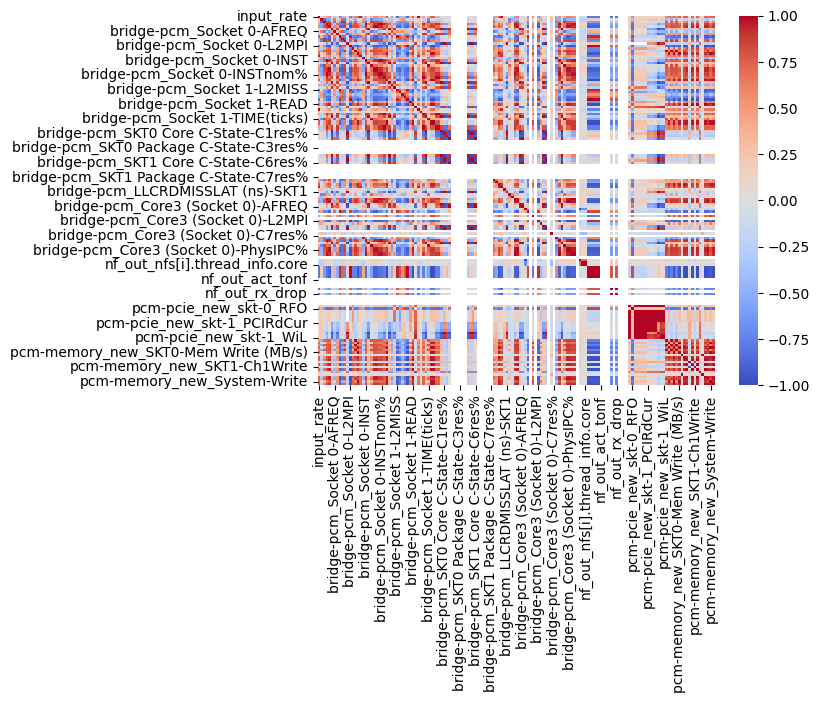

In [6]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")

plt.show()

In [31]:
print(data)

                            input_rate  output_rate       latency  \
File                                                                
averages_summary.csv       9358.195184  7949.270203   3184.440708   
fixed_rate_1024B-1024.csv  9962.284017  8893.565274   2282.590615   
fixed_rate_1024B-256.csv   9967.724874  9896.091925    318.508225   
fixed_rate_1024B-4096.csv  9914.573628  2922.755191  14207.629870   
fixed_rate_1024B-512.csv   9958.959414  8331.940249   4796.679062   
fixed_rate_128B-1024.csv   9542.024668  9443.117587     92.341079   
fixed_rate_128B-256.csv    9489.139303  9355.605941    466.577088   
fixed_rate_128B-4096.csv   9451.996552  9416.646260     60.099068   
fixed_rate_128B-512.csv    9584.475282  9569.365388     64.679875   
fixed_rate_1510B-1024.csv  9966.692840  3937.302812  10729.075039   
fixed_rate_1510B-256.csv   9972.626527  9870.314725   2477.820127   
fixed_rate_1510B-4096.csv  9955.893249  2570.546383  14960.591141   
fixed_rate_1510B-512.csv   9968.44

# efficiency

In [40]:
import pandas as pd

data['efficiency'] = data.iloc[:, 1] / data.iloc[:, 0]
efficiency_correlations = data.corr()['efficiency'].sort_values(ascending=False)

for column in efficiency_correlations.index:
    if column != 'efficiency':  # Skip correlation of 'efficiency' with itself
        print(f"Correlation between efficiency and {column}: {efficiency_correlations[column]:.2f}")



Correlation between efficiency and bridge-pcm_Socket 0-L3HIT: 0.94
Correlation between efficiency and output_rate: 0.89
Correlation between efficiency and bridge-pcm_Socket 0-AFREQ: 0.77
Correlation between efficiency and bridge-pcm_Core3 (Socket 0)-TEMP: 0.72
Correlation between efficiency and bridge-pcm_Core3 (Socket 0)-L2MISS: 0.70
Correlation between efficiency and bridge-pcm_Socket 1-L2HIT: 0.68
Correlation between efficiency and bridge-pcm_Socket 1-L3MPI: 0.65
Correlation between efficiency and pcm-pcie_new_skt-0_RFO: 0.65
Correlation between efficiency and bridge-pcm_Socket 0-TEMP: 0.64
Correlation between efficiency and bridge-pcm_Socket 0-L2MISS: 0.61
Correlation between efficiency and bridge-pcm_Core3 (Socket 0)-L2MPI: 0.60
Correlation between efficiency and bridge-pcm_Socket 0-L2MPI: 0.59
Correlation between efficiency and bridge-pcm_Socket 1-L3HIT: 0.59
Correlation between efficiency and nf_out_tx_pps: 0.55
Correlation between efficiency and nf_out_rx_pps: 0.55
Correlation 

['bridge-pcm_Socket 0-L3HIT', 'output_rate', 'bridge-pcm_Socket 0-AFREQ', 'bridge-pcm_Core3 (Socket 0)-TEMP', 'bridge-pcm_Core3 (Socket 0)-L2MISS', 'bridge-pcm_Socket 1-L2HIT', 'bridge-pcm_Socket 1-L3MPI']


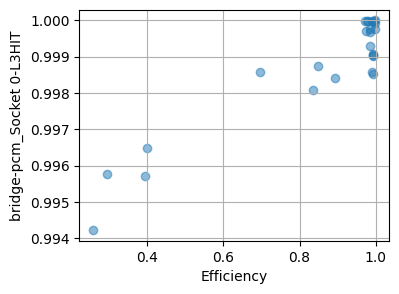

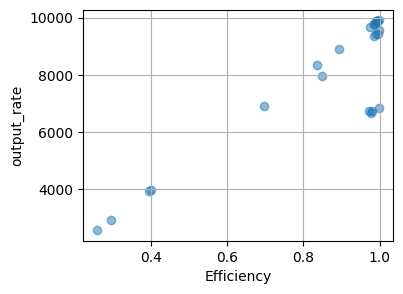

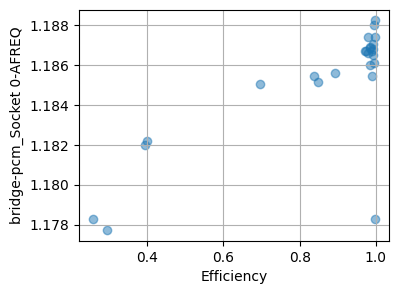

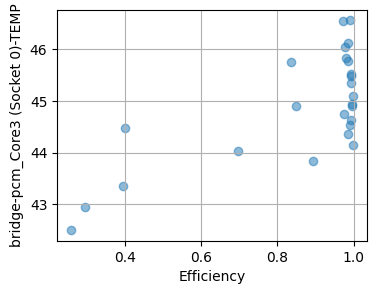

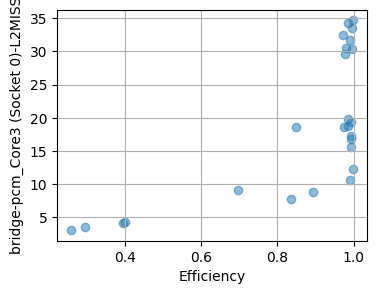

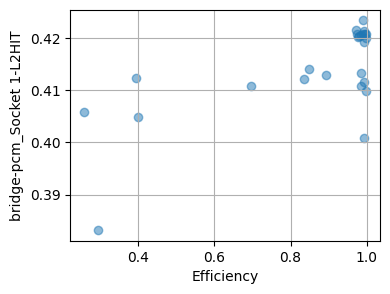

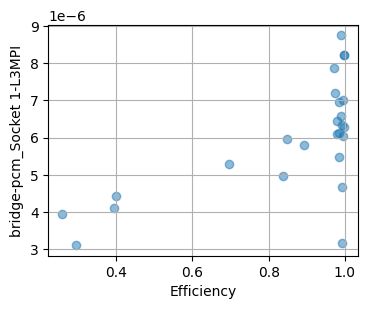

In [41]:
import matplotlib.pyplot as plt

data['efficiency'] = data.iloc[:, 1] / data.iloc[:, 0]

efficiency_correlations = data.corr()['efficiency'].sort_values(ascending=False)

high_corr_columns = [col for col in efficiency_correlations.index if efficiency_correlations[col] > 0.65 and col != 'efficiency']
print(high_corr_columns)
# Plotting
for column in high_corr_columns:
    plt.figure(figsize=(4,3))
    plt.scatter(data['efficiency'], data[column], alpha=0.5)
    plt.xlabel('Efficiency')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()



# throughput

In [20]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)
for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge-pcm_Socket 0-L3MPI: nan
Correlation between output_rate and bridge-pcm_Socket 0-WRITE: 0.94
Correlation between output_rate and bridge-pcm_Socket 0-READ: 0.93
Correlation between output_rate and bridge-pcm_Socket 1-L3OCC: 0.79
Correlation between output_rate and bridge-pcm_Socket 0-L2MISS: 0.64
Correlation between output_rate and bridge-pcm_Socket 0-L2MPI: 0.61
Correlation between output_rate and bridge-pcm_Socket 0-EXEC: 0.61
Correlation between output_rate and bridge-pcm_Socket 0-INSTnom: 0.58
Correlation between output_rate and bridge-pcm_Socket 0-INST: 0.58
Correlation between output_rate and bridge-pcm_Socket 0-INSTnom%: 0.58
Correlation between output_rate and bridge-pcm_Socket 0-TEMP: 0.55
Correlation between output_rate and bridge-pcm_Socket 0-L3OCC: 0.47
Correlation between output_rate and bridge-pcm_Socket 1-TEMP: 0.44
Correlation between output_rate and bridge-pcm_Socket 0-LOCAL: 0.38
Correlation between output_rate and bridge-pcm_S

C:\Users\Qiong\AppData\Local\Temp\ipykernel_26376\1284842097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


['efficiency', 'bridge-pcm_Socket 0-L3HIT', 'bridge-pcm_Socket 0-AFREQ']


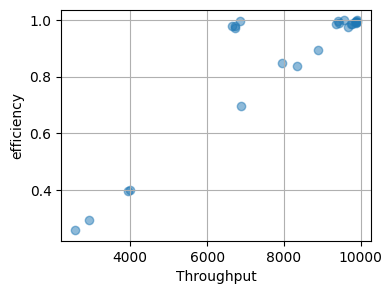

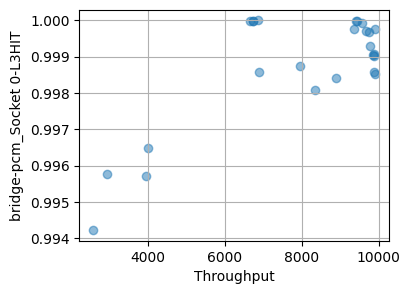

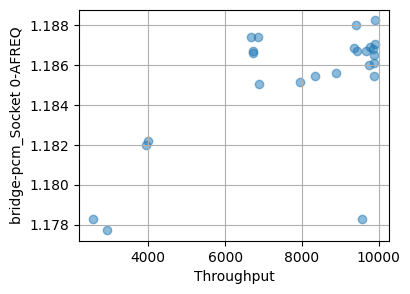

In [57]:
import matplotlib.pyplot as plt




output_correlations = data.corr()['output_rate'].sort_values(ascending=False)

high_corr_columns = [col for col in output_correlations .index if output_correlations [col] > 0.65 and col != 'output_rate']
print(high_corr_columns)
# Plotting
for column in high_corr_columns:
    plt.figure(figsize=(4,3))
    plt.scatter(data['output_rate'], data[column], alpha=0.5)
    plt.xlabel('Throughput')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


# latency

In [55]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and bridge-pcm_Socket 0-L3HIT: 0.95
Correlation between latency and bridge-pcm_Socket 0-L2HIT: 0.91
Correlation between latency and bridge-pcm_Socket 0-TIME(ticks): 0.87
Correlation between latency and bridge-pcm_Socket 1-TIME(ticks): 0.87
Correlation between latency and bridge-pcm_Socket 0-IPC: 0.81
Correlation between latency and bridge-pcm_Socket 0-PhysIPC: 0.81
Correlation between latency and bridge-pcm_Socket 0-PhysIPC%: 0.81
Correlation between latency and bridge-pcm_Socket 0-AFREQ: 0.77
Correlation between latency and bridge-pcm_Socket 0-READ: 0.76
Correlation between latency and bridge-pcm_Socket 0-INSTnom: 0.74
Correlation between latency and bridge-pcm_Socket 0-INST: 0.74
Correlation between latency and bridge-pcm_Socket 0-INSTnom%: 0.74
Correlation between latency and bridge-pcm_Socket 0-EXEC: 0.74
Correlation between latency and bridge-pcm_Core3 (Socket 0)-L2MISS: 0.73
Correlation between latency and bridge-pcm_Socket 1-L2HIT: 0.66
Correlation be

In [19]:
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame

output_correlations = data.corr()['latency'].sort_values(ascending=False)

high_corr_columns = [col for col in output_correlations .index if output_correlations [col] > 0.9 and col != 'latency']

print(high_corr_columns)
# Plotting
for column in high_corr_columns:
    plt.figure(figsize=(4,3))
    plt.scatter(data['latency'].div(1000), data[column], alpha=0.5)
    plt.xlabel('Latency (1e3)')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


[]


C:\Users\Qiong\AppData\Local\Temp\ipykernel_26376\20368432.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output_correlations = data.corr()['latency'].sort_values(ascending=False)


In [72]:
current_dir = os.getcwd()

exp_ls_csv = "averages_summary.csv"
file_path = os.path.abspath(os.path.join("..\\bridge\\datasets", exp_ls_csv))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
print(data)

                            input_rate  output_rate       latency  \
File                                                                
fixed_rate_1024B-1024.csv  9962.284017  8893.565274   2282.590615   
fixed_rate_1024B-256.csv   9967.724874  9896.091925    318.508225   
fixed_rate_1024B-4096.csv  9914.573628  2922.755191  14207.629870   
fixed_rate_1024B-512.csv   9958.959414  8331.940249   4796.679062   
fixed_rate_128B-1024.csv   9542.024668  9443.117587     92.341079   
fixed_rate_128B-256.csv    9489.139303  9355.605941    466.577088   
fixed_rate_128B-4096.csv   9451.996552  9416.646260     60.099068   
fixed_rate_128B-512.csv    9584.475282  9569.365388     64.679875   
fixed_rate_1510B-1024.csv  9966.692840  3937.302812  10729.075039   
fixed_rate_1510B-256.csv   9972.626527  9870.314725   2477.820127   
fixed_rate_1510B-4096.csv  9955.893249  2570.546383  14960.591141   
fixed_rate_1510B-512.csv   9968.445600  3985.955486  10036.524324   
fixed_rate_256B-1024.csv   9912.83

# In different subsets

In [100]:
import pandas as pd
exp_ls_csv = "averages_summary.csv"
file_path = os.path.abspath(os.path.join("..\\bridge\\datasets", exp_ls_csv))

data = pd.read_csv(file_path)
data = data.replace(['<not counted>'], np.nan)


def contains_fixed_rate(row,pkt):
    return row.astype(str).str.contains(pkt).any()


def contains_fixed_rate(row, pkt):
    return row.astype(str).str.contains(pkt).any()

filtered_data1024 = data[data.apply(lambda row: contains_fixed_rate(row, pkt='fixed_rate_1024B'), axis=1)]

filtered_data1510 = data[data.apply(lambda row: contains_fixed_rate(row, pkt='fixed_rate_1510B'), axis=1)]

In [102]:
filtered_data1024['efficiency'] = filtered_data1024.iloc[:, 2] / filtered_data1024.iloc[:, 1]
efficiency_correlations1024 = filtered_data1024.corr()['efficiency'].sort_values(ascending=False)

filtered_data1510['efficiency'] = filtered_data1510.iloc[:, 2] / filtered_data1510.iloc[:, 1]
efficiency_correlations1510 = filtered_data1510.corr()['efficiency'].sort_values(ascending=False)
for column in efficiency_correlations1024.index:
    if column != 'efficiency':  # Skip correlation of 'efficiency' with itself
        print(f"Correlation between efficiency and {column}: {efficiency_correlations[column]:.2f}")



Correlation between efficiency and output_rate: 1.00
Correlation between efficiency and pcm-pcie_new_skt-0_PCIRdCur: 1.00
Correlation between efficiency and pcm-memory_new_SKT0-Ch0Write: 1.00
Correlation between efficiency and input_rate: 1.00
Correlation between efficiency and bridge-pcm_Socket 0-AFREQ: 1.00
Correlation between efficiency and bridge-pcm_Socket 0-L3HIT: 1.00
Correlation between efficiency and pcm-pcie_new_skt-0_ItoM: 0.99
Correlation between efficiency and bridge-pcm_Socket 1-PhysIPC: 0.99
Correlation between efficiency and bridge-pcm_Socket 1-PhysIPC%: 0.99
Correlation between efficiency and bridge-pcm_Socket 1-IPC: 0.99
Correlation between efficiency and bridge-pcm_Socket 1-INSTnom%: 0.99
Correlation between efficiency and bridge-pcm_Socket 1-INST: 0.99
Correlation between efficiency and nf_out_rx: 0.99
Correlation between efficiency and nf_out_act_out: 0.99
Correlation between efficiency and nf_out_tx: 0.99
Correlation between efficiency and pcm-pcie_new_skt-0_RFO: 

C:\Users\Qiong\AppData\Local\Temp\ipykernel_31724\1054746417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1024['efficiency'] = filtered_data1024.iloc[:, 2] / filtered_data1024.iloc[:, 1]
C:\Users\Qiong\AppData\Local\Temp\ipykernel_31724\1054746417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  efficiency_correlations1024 = filtered_data1024.corr()['efficiency'].sort_values(ascending=False)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_31724\1054746417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

['output_rate', 'pcm-pcie_new_skt-0_PCIRdCur', 'pcm-memory_new_SKT0-Ch0Write', 'input_rate', 'bridge-pcm_Socket 0-AFREQ', 'bridge-pcm_Socket 0-L3HIT', 'pcm-pcie_new_skt-0_ItoM', 'bridge-pcm_Socket 1-PhysIPC', 'bridge-pcm_Socket 1-PhysIPC%', 'bridge-pcm_Socket 1-IPC', 'bridge-pcm_Socket 1-INSTnom%', 'bridge-pcm_Socket 1-INST', 'nf_out_rx', 'nf_out_act_out', 'nf_out_tx', 'pcm-pcie_new_skt-0_RFO', 'bridge-pcm_SKT1 Core C-State-C6res%', 'nf_out_rx_pps', 'nf_out_tx_pps', 'pcm-pcie_new_skt-1_ItoM', 'bridge-pcm_SKT0 Core C-State-C6res%', 'pcm-memory_new_SKT0-Mem Write (MB/s)', 'bridge-pcm_Socket 0-WRITE', 'pcm-memory_new_System-Write', 'bridge-pcm_Socket 1-EXEC', 'bridge-pcm_Core3 (Socket 0)-AFREQ', 'bridge-pcm_DRAM Energy (Joules)-SKT1', 'bridge-pcm_Core3 (Socket 0)-FREQ']


C:\Users\Qiong\AppData\Local\Temp\ipykernel_31724\899469688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output_correlations1024 = filtered_data1024.corr()['efficiency'].sort_values(ascending=False)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_31724\899469688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output_correlations1510 = filtered_data1510.corr()['efficiency'].sort_values(ascending=False)


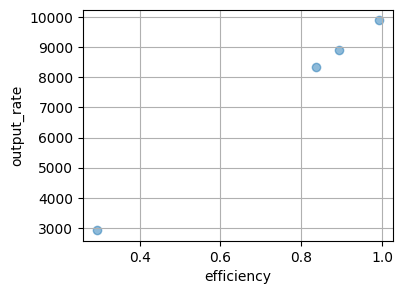

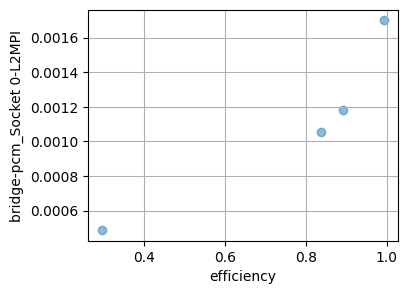

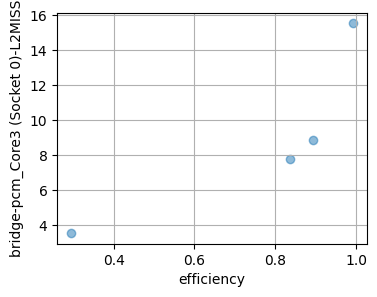

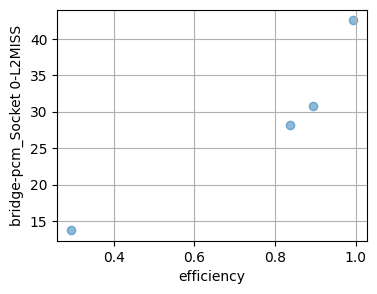

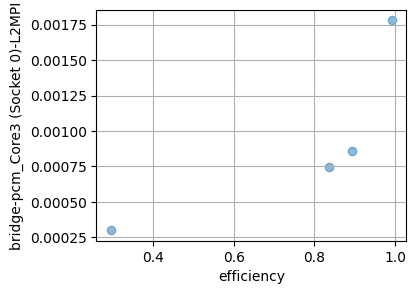

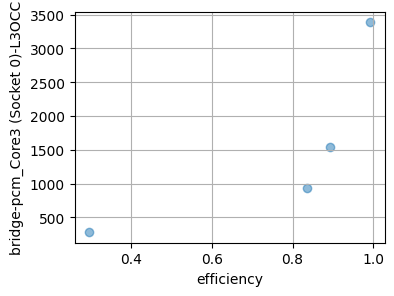

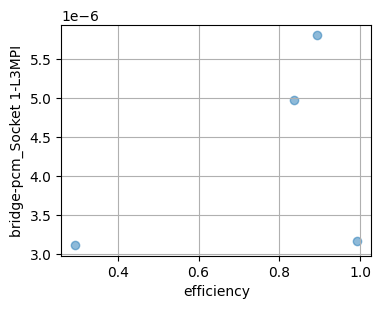

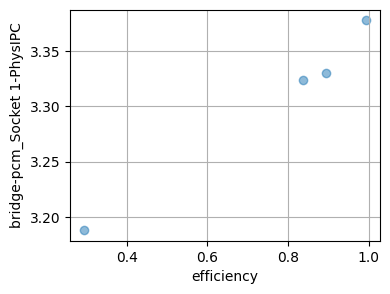

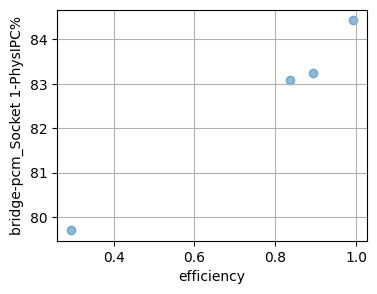

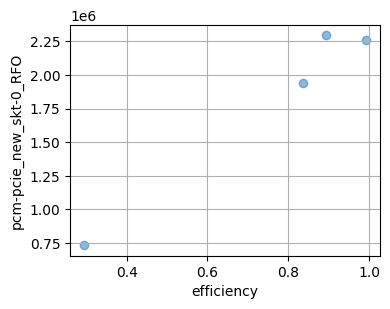

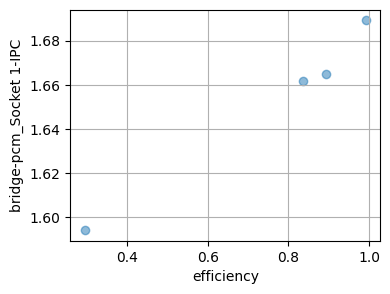

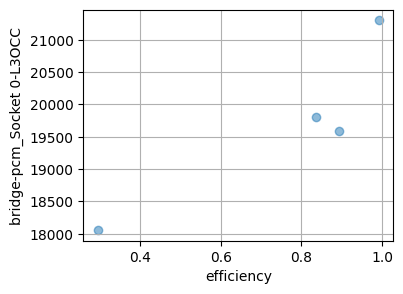

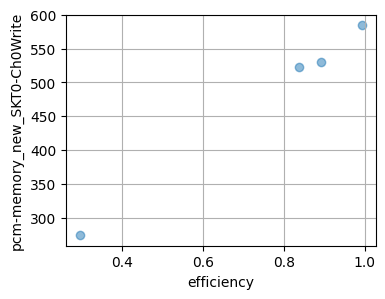

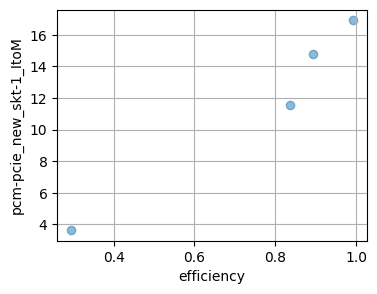

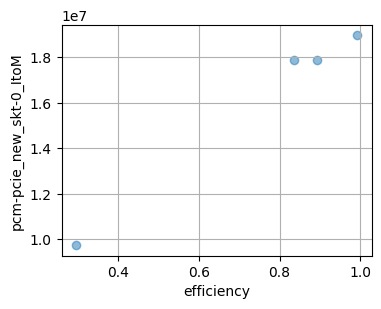

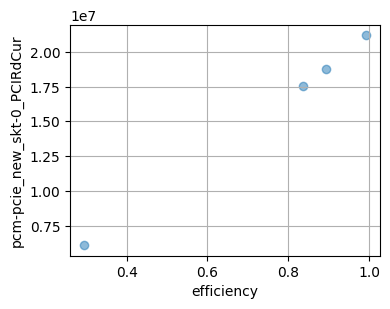

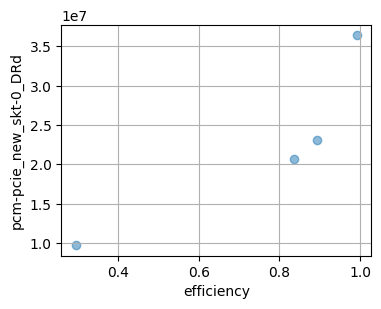

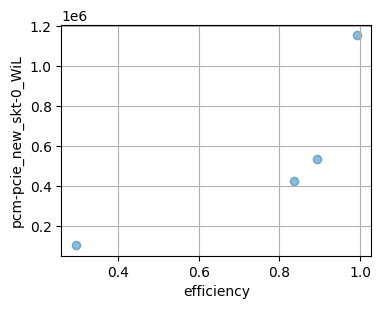

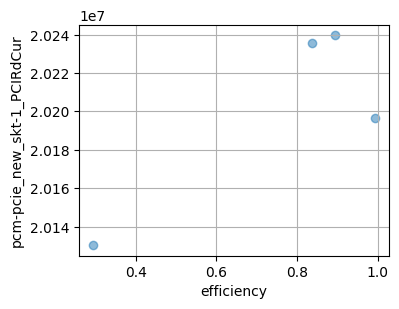

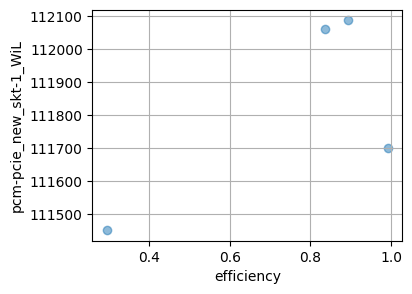

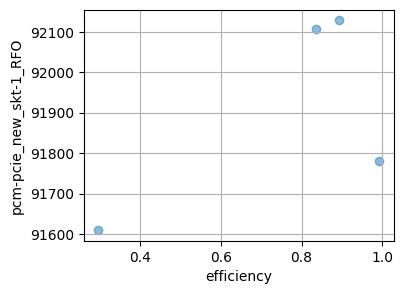

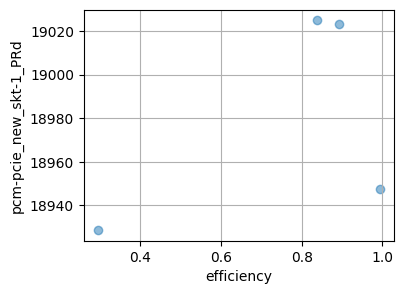

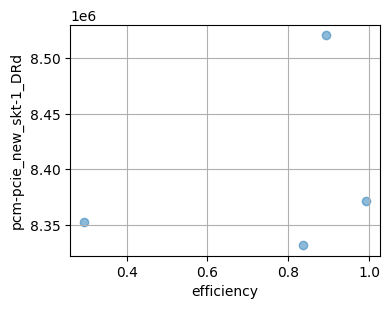

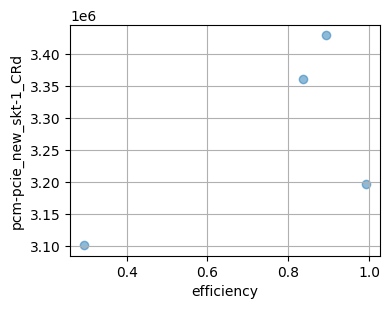

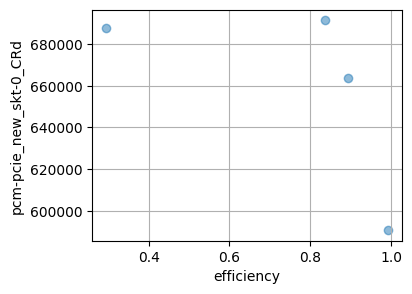

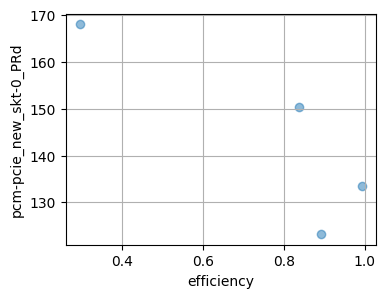

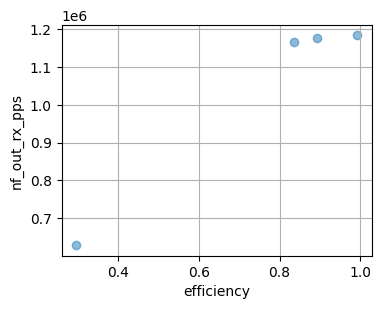

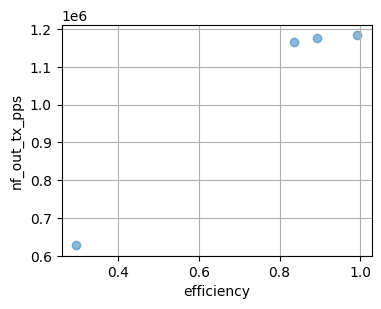

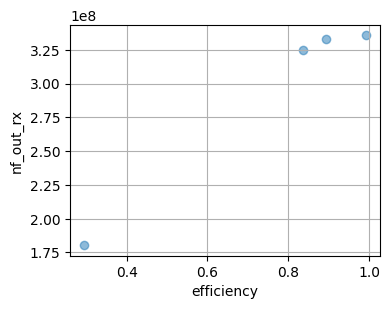

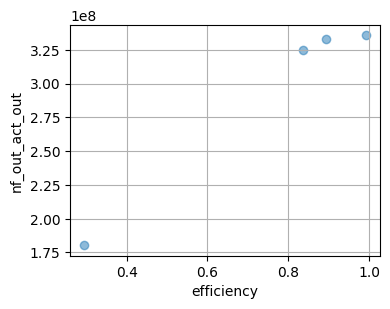

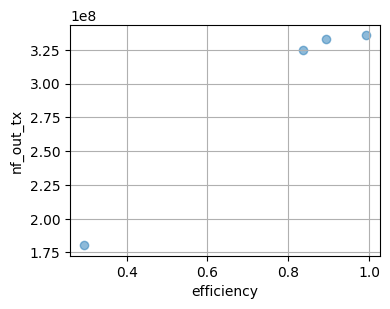

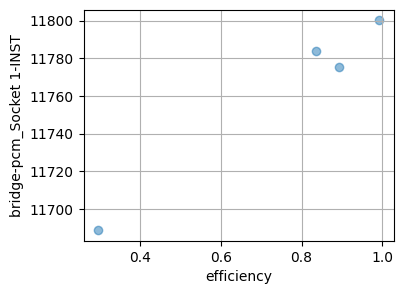

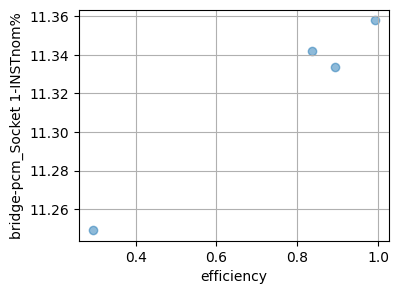

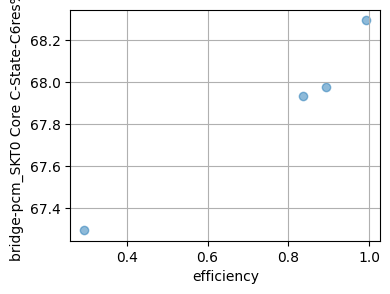

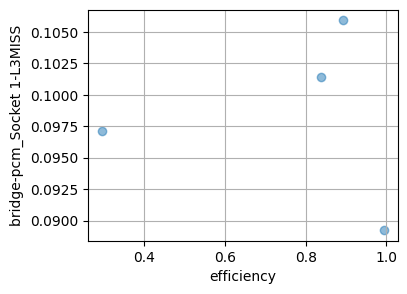

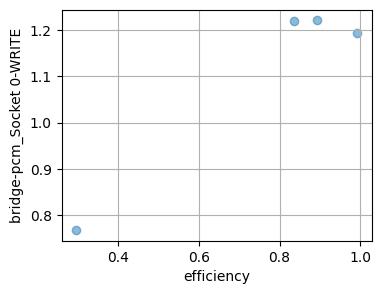

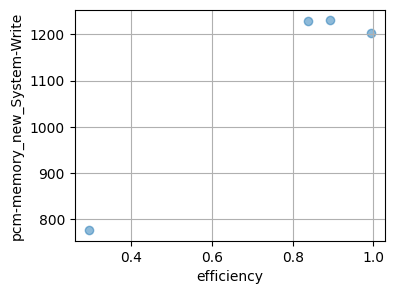

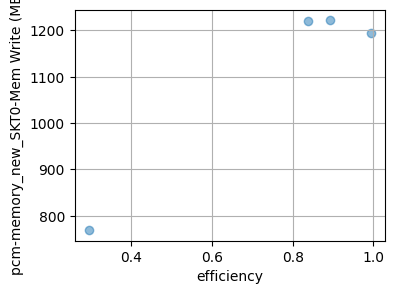

In [109]:
output_correlations1024 = filtered_data1024.corr()['efficiency'].sort_values(ascending=False)
output_correlations1510 = filtered_data1510.corr()['efficiency'].sort_values(ascending=False)
high_corr_columns = [col for col in output_correlations1024 .index if output_correlations1024 [col] > 0.95 and col != 'efficiency']
high_corr_columns_1510 = [col for col in output_correlations1510 .index if output_correlations1510 [col] > 0.95 and col != 'efficiency']
print(high_corr_columns)
# Plotting
for column in high_corr_columns_1510:
    plt.figure(figsize=(4,3))
    plt.scatter(filtered_data1024['efficiency'], filtered_data1024[column], alpha=0.5)
  #  plt.scatter(filtered_data1510['efficiency'], filtered_data1510[column], alpha=0.5,c='r')
    plt.xlabel('efficiency')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

# Analysis the related feature

In [17]:
# Generate file paths
exp_ls_csv = "fixed_rate_1510B-{}.csv"
file_paths = [os.path.abspath(os.path.join("..\\bridge\\datasets", exp_ls_csv.format(i))) for i in [256,512,1024,4096]]

# Read each CSV file
dataframes = [pd.read_csv(file) for file in file_paths]

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_1510B.csv', index=False)


In [34]:
current_dir = os.getcwd()

exp_ls_csv = "combined_1510B.csv"
file_path = os.path.abspath(os.path.join("..\\bridge", exp_ls_csv))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
print(data)

             input_rate  output_rate    latency bridge-pcm_System-Date  \
Unnamed: 0                                                               
0           4626.900045   501.777497    315.351             2023-10-29   
1           2741.199737  2984.712018    352.759             2023-10-29   
2           7757.322532  7991.762129    389.085             2023-10-29   
3           9999.599285  9927.625162    402.992             2023-10-29   
4           9999.598381  9918.381631    407.363             2023-10-29   
...                 ...          ...        ...                    ...   
577         9988.755484  2629.815522  15000.000             2023-11-01   
578         9979.375182  2487.817815  15000.000             2023-11-01   
579         9979.553959  2565.427343  15000.000             2023-11-01   
580         9988.387863  2590.635005  15000.000             2023-11-01   
581         9994.781464  2603.873900  15000.000             2023-11-01   

           bridge-pcm_System-Time  br

In [35]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))
sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)
for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge-pcm_Core3 (Socket 0)-L2MISS: 0.99
Correlation between output_rate and bridge-pcm_Socket 0-L2HIT: 0.99
Correlation between output_rate and bridge-pcm_Socket 0-L2MISS: 0.99
Correlation between output_rate and bridge-pcm_Socket 0-L3MPI: nan
Correlation between output_rate and bridge-pcm_Socket 0-READ: 0.99
Correlation between output_rate and bridge-pcm_Socket 0-L2MPI: 0.98
Correlation between output_rate and bridge-pcm_Socket 0-INST: 0.95
Correlation between output_rate and bridge-pcm_Socket 0-INSTnom: 0.95
Correlation between output_rate and bridge-pcm_Socket 0-INSTnom%: 0.95
Correlation between output_rate and bridge-pcm_Socket 0-EXEC: 0.95
Correlation between output_rate and bridge-pcm_Socket 0-WRITE: 0.95
Correlation between output_rate and latency: 0.67
Correlation between output_rate and bridge-pcm_Socket 1-L3OCC: 0.61
Correlation between output_rate and bridge-pcm_Socket 0-PhysIPC: 0.56
Correlation between output_rate and bridge-pcm_Socket

C:\Users\Qiong\AppData\Local\Temp\ipykernel_26376\929107038.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
